In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_3 = pd.read_csv('/workspaces/piv_2025_2/src/proyecto_integrador/static/csv/dataset_enriquecido.csv')

In [3]:
# Definir rango de fechas
start_date = pd.to_datetime("2022-01-01")
end_date = pd.to_datetime("2024-12-31")

# Número de filas
n = len(df_3)

# Generar fechas aleatorias
random_days = np.random.randint(0, (end_date - start_date).days, n)
df_3['Fecha'] = start_date + pd.to_timedelta(random_days, unit='D')

# 4. Extraer año, mes y día
df_3['Año'] = df_3['Fecha'].dt.year
df_3['Mes'] = df_3['Fecha'].dt.month
df_3['Día'] = df_3['Fecha'].dt.day

# 5. Mostrar resultado
print(df_3[['Fecha','Año','Mes','Día']].head())

       Fecha   Año  Mes  Día
0 2023-10-18  2023   10   18
1 2022-10-13  2022   10   13
2 2023-01-29  2023    1   29
3 2023-04-04  2023    4    4
4 2024-02-03  2024    2    3


In [4]:
print(df_3.columns)

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Fecha', 'Año', 'Mes', 'Día'],
      dtype='object')


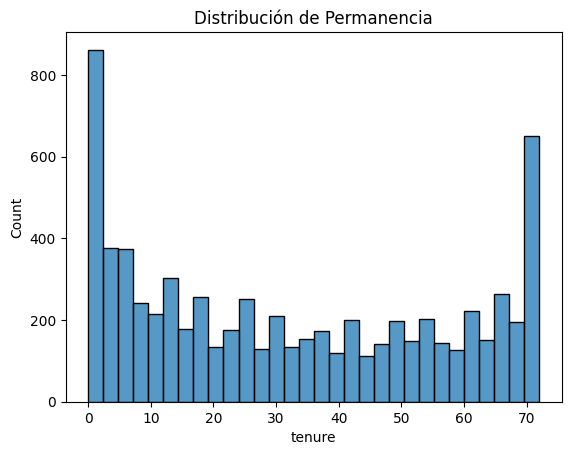

In [5]:
# Histograma Tenure
sns.histplot(df_3['tenure'], bins=30, kde=False)
plt.title("Distribución de Permanencia")
plt.show()

Los clientes nuevos (menos de 12 meses) son más vulnerables a abandonar.

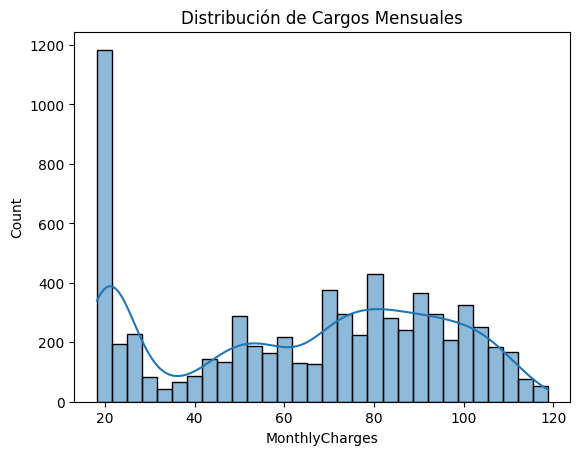

In [32]:
# Histograma MonthlyCharges
sns.histplot(df_3['MonthlyCharges'], bins=30, kde=True)
plt.title("Distribución de Cargos Mensuales")
plt.show()

clientes con cargos más altos tienden a abandonar más.

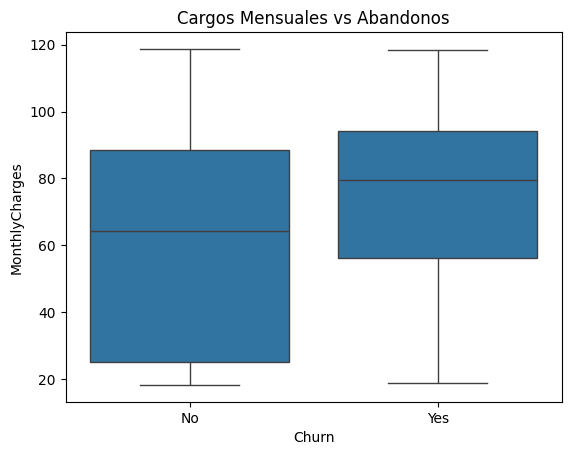

In [33]:
# Boxplot MonthlyCharges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_3)
plt.title("Cargos Mensuales vs Abandonos")
plt.show()

Compara la mediana y dispersión de cargos mensuales entre clientes que se quedan y los que se van.

Los que se van suelen tener cargos más elevados.

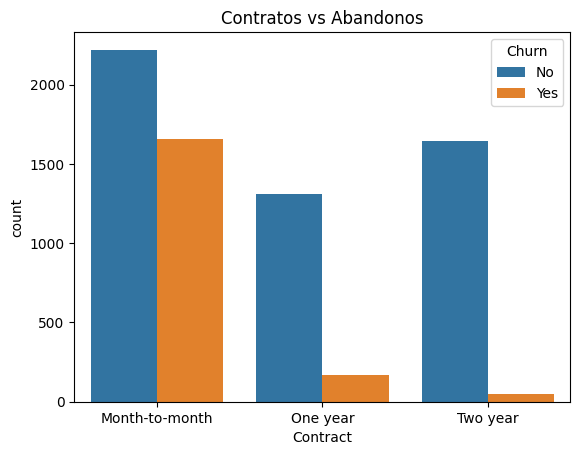

In [34]:
# Barplot Contract vs Churn
sns.countplot(x='Contract', hue='Churn', data=df_3)
plt.title("Contratos vs Abandonos")
plt.show()

Muestra la proporción de churn según tipo de contrato.

Contratos mensuales concentran la mayoría de los abandonos, mientras que contratos de 1 o 2 años retienen mejor.

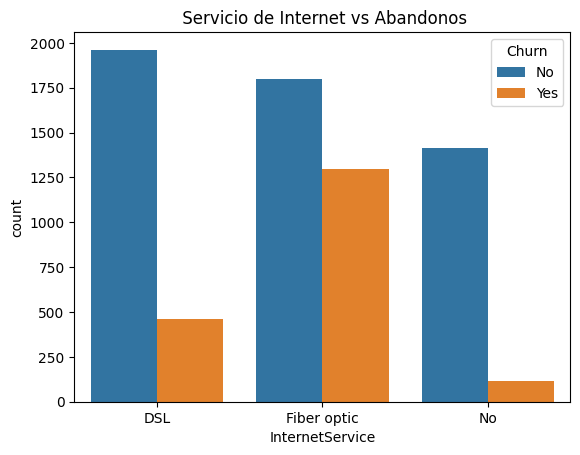

In [35]:
# Barplot InternetService vs Churn
sns.countplot(x='InternetService', hue='Churn', data=df_3)
plt.title(" Servicio de Internet vs Abandonos")
plt.show()

Relación entre tipo de servicio de internet y churn.

Los clientes con fibra óptica presentan mayor tasa de abandono que los de DSL.

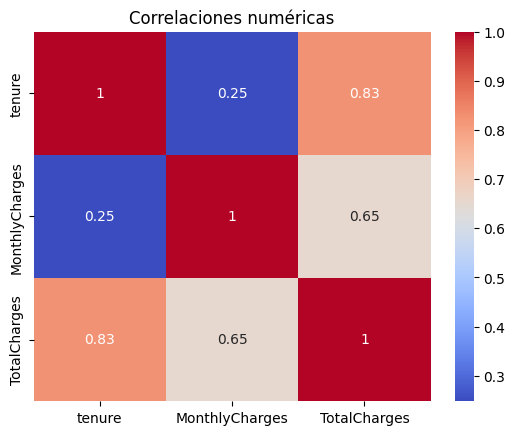

In [42]:
# Heatmap de correlaciones
df_3['TotalCharges'] = pd.to_numeric(df_3['TotalCharges'], errors='coerce')
corr = df_3[['tenure','MonthlyCharges','TotalCharges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlaciones numéricas")
plt.show()

Relación entre tenure, MonthlyCharges y TotalCharges.

Tenure correlaciona negativamente con churn; MonthlyCharges y TotalCharges están altamente correlacionados.

/tmp/ipykernel_52578/2889041138.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn['trimestre'] = df_churn['Fecha'].dt.to_period("Q")


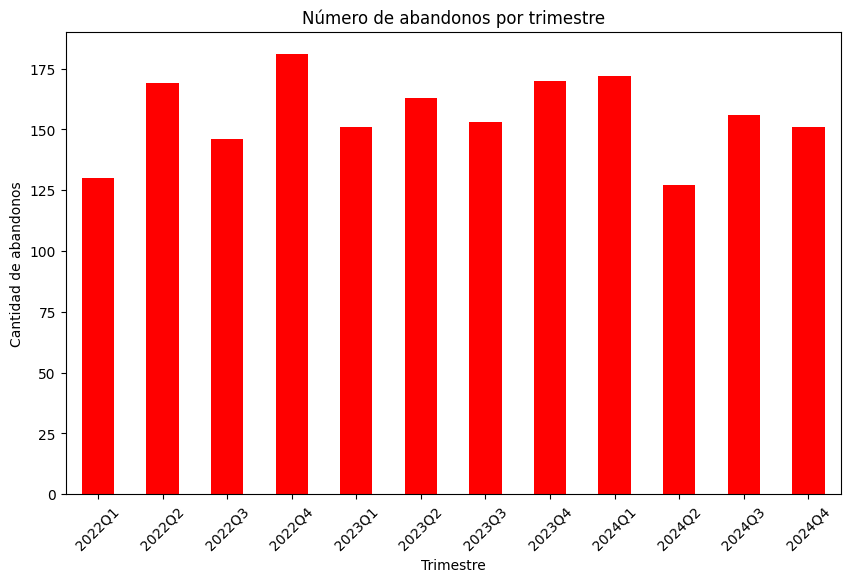

In [41]:
# Abandonos por fecha
# Asegurar que la columna fecha sea tipo datetime
# 2. Asegurar que la columna fecha sea datetime
df_3['Fecha'] = pd.to_datetime(df_3['Fecha'], errors='coerce')

# 3. Filtrar abandonos
df_churn = df_3[df_3['Churn'].str.lower() == 'yes']

# 4. Agrupar por trimestre
df_churn['trimestre'] = df_churn['Fecha'].dt.to_period("Q")
churn_por_trimestre = df_churn.groupby('trimestre').size()

# 5. Graficar
plt.figure(figsize=(10,6))
churn_por_trimestre.plot(kind='bar', color='red')
plt.title("Número de abandonos por trimestre")
plt.xlabel("Trimestre")
plt.ylabel("Cantidad de abandonos")
plt.xticks(rotation=45)
plt.show()